In [1]:
%load_ext autoreload
%autoreload 2


import json
import os
import pkg_resources
import matplotlib.pyplot as plt
import numpy as np
# from sklearn import cluster

# from tslearn.clustering import TimeSeriesKMeans

import seaborn as sns


from ScheduleSampler import ScheduleSampler, activity_map, start_times, see_activities
from ScheduleDistributionSampler import ScheduleDistributionSampler

filter_num=0
idle_sampling_factor=1.0

In [2]:
print({a : {} for a in set(activity_map.values())})

{'vaccuum_cleaning': {}, 'wash_dishes': {}, 'brushing_teeth': {}, 'come_home': {}, 'showering': {}, None: {}, 'reading': {}, 'listening_to_music': {}, 'take_out_trash': {}, 'lunch': {}, 'watching_tv': {}, 'kitchen_cleaning': {}, 'cleaning': {}, 'laundry': {}, 'going_to_the_bathroom': {}, 'breakfast': {}, 'taking_medication': {}, 'getting_dressed': {}, 'computer_work': {}, 'dinner': {}, 'leave_home': {}, 'socializing': {}, 'playing_music': {}}


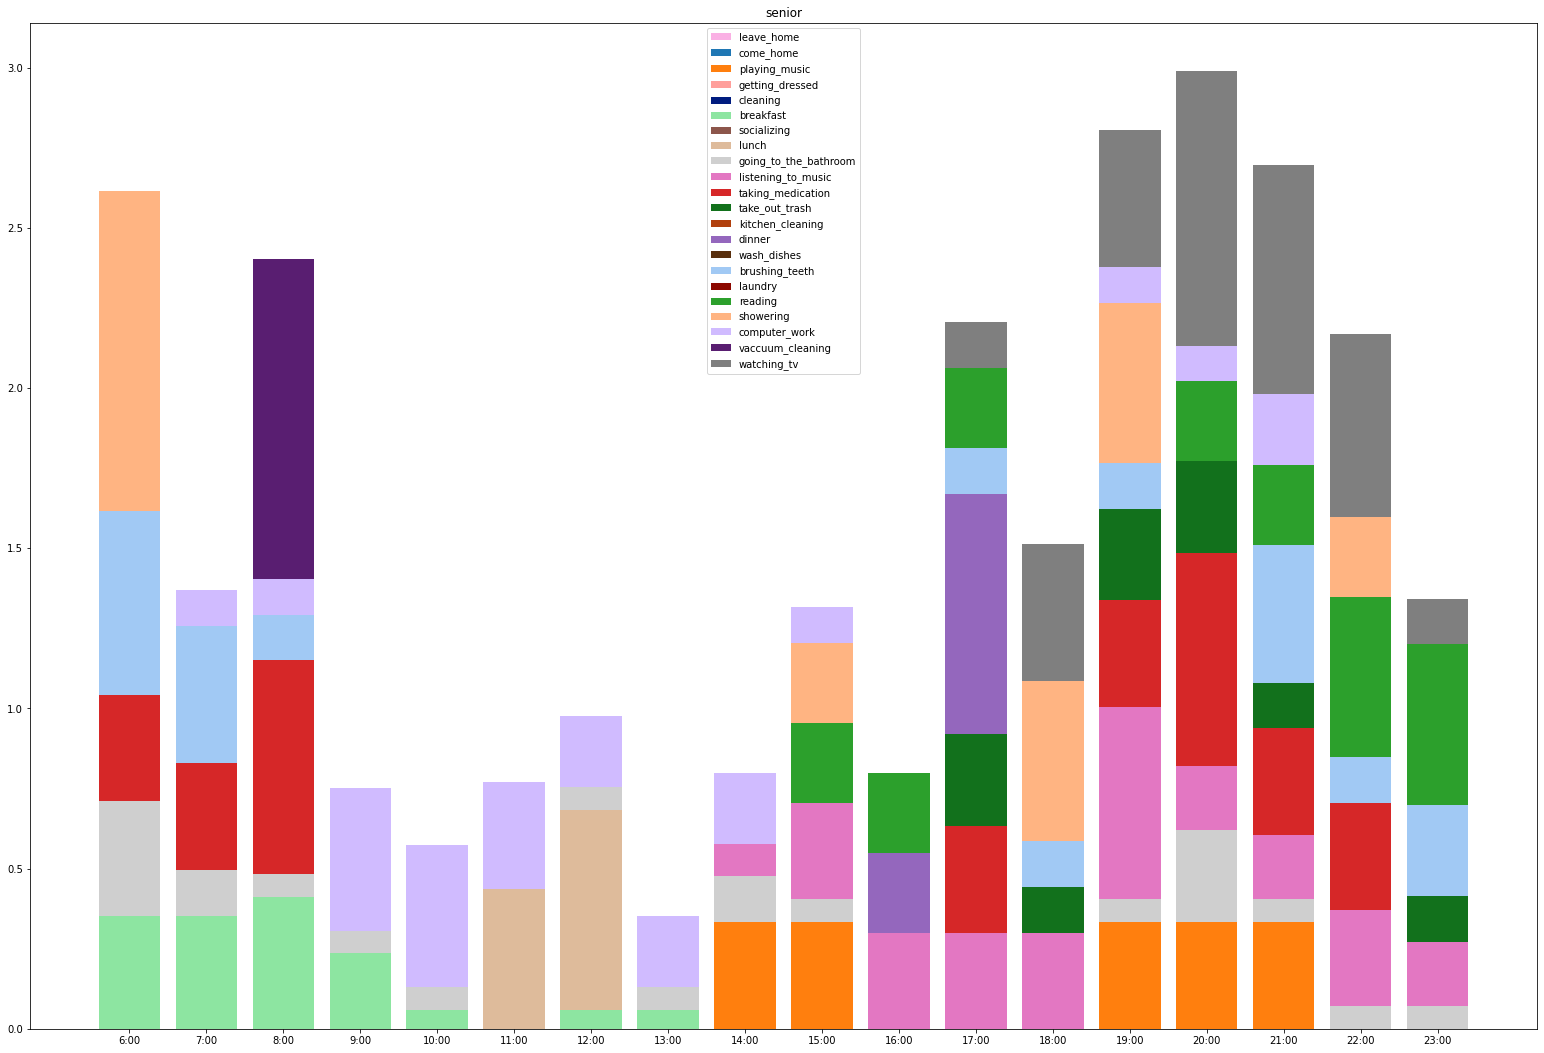

In [6]:
for type in ['senior', 'home_maker', 'work_from_home', 'hard_worker', 'A1MS6RMVVATCNE', 'A2146E0NJ4893F', 'basic']:
    ScheduleDistributionSampler(type).plot('data/dataVisuals/originalDistributions/'+type+'.jpg')    
# fig, ax = plt.subplots()
# fig.set_size_inches(27, 18.5)
# bottom = np.zeros_like(s.activity_histograms['breakfast'])
# for activity, freqs in s.activity_histograms.items():
#     ax.bar(start_times, freqs, label=activity, bottom=bottom, color=color_map[activity])
# ax.set_xticks(start_times)
# ax.set_xticklabels([str(s)+':00' for s in start_times])
# plt.legend()
# plt.show()

In [ ]:
persona_traits = {
'leaving_home_and_coming_back': {"short" : [], "full_workday" : [], "never":[]}, 
'leave_home': {"early" : [], "late" : [], "at_night" : [], "multiple_times": [], "never":[]}, 
'come_home': {"early" : [], "late" : [], "at_night" : [], "multiple_times": [], "never":[]}, 
'playing_music': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}, 
'getting_dressed': {"for_work":[], "for_evening":[], "morning_andEvening":[], "not_at_all":[]}, 
'cleaning': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}, 
'breakfast': {"has_breakfast":[], "skips_breakfast":[]}, 
'socializing': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}, 
'lunch': {"has_lunch":[], "skips_lunch":[]}, 
'going_to_the_bathroom': {"over three times":[], "under_three_times":[]}, 
'listening_to_music':  {"morning":[], "evening":[], "morning_and_evening":[], "not_at_all":[]}, 
'taking_medication': {"morning/noon":[], "evening":[], "twice":[], "never":[]}, 
'take_out_trash': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}, 
'kitchen_cleaning': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}, 
'dinner': {"early":[], "on_time":[], "late":[]}, 
'wash_dishes': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]},  
'brushing_teeth': {"morning_only":[], "twice":[]}, 
'laundry': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}, 
'hand_wash_clothes': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}, 
'reading': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}, 
'showering': {"morning":[], "evening":[], "twice":[]}, 
'computer_work': {"work_from_home_day":[], "sparse":[]}, 
'vaccuum_cleaning': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]},  
'watching_tv': {"morning":[], "evening":[], "multiple_times":[], "not_at_all":[]}
}


schedule_num = 0
for root, dirs, files in os.walk('data/AMT_Schedules'):
    # f, ind_plot = plt.subplots(len(files), len(see_activities))
    # f.set_size_inches(40, 30)
    scene_histogram = {}
    for f in files:
        if f.endswith('.json'):
            with open(os.path.join(root,f)) as file:
                sch = json.load(file)
            age = int(sch["questionnaireData"]["age"][:2])
            if sch["questionnaireData"]["gender"] == 'Female': c = [age/60, 0, 0]
            if sch["questionnaireData"]["gender"] == 'Male': c = [0, 0, age/60]
            # self.ind_plot[self.schedule_num,0].set_ylabel(str(age) + ', '+gender[0])
            activity_times = {}
            scene_histogram[f] = {k:{s:0 for s in start_times} for k in activity_map.values()}
            for timestring,activities in sch['activitiesChosen'].items():
                start_time = timestring.split('m')[0]
                start_time = int(start_time[:-1]) if start_time[-1] == 'a' else int(start_time[:-1])+12
                if start_time == 24:
                    start_time = 12
                for act in activities:
                    sch_activity = activity_map[act]
                    scene_histogram[f][sch_activity][start_time] += 1
            # ind_plot[schedule_num,0].set_ylabel(f[:6])
            schedule_num += 1

normalized_scene_histogram = {}
for f in scene_histogram:
    normalized_scene_histogram[f] = {}
    for act in scene_histogram[f]:
        freq = np.array(list(scene_histogram[f][act].values()))
        freq = freq/sum(freq)
        normalized_scene_histogram[f][act] = freq

# for act, traits in persona_traits.items():
#     trait_options = ['None'] + list(traits)
#     persona_traits[act]['None'] =[]
#     print('\n\n'+act)
#     print('\n'.join([str(i)+': '+tr for i,tr in enumerate(trait_options)]))
#     for f in scene_histogram:
#         if f.startswith('AFER49') or f.startswith('A3EF9I') or f.startswith('A#FKOG') or f.startswith('A332L3'):
#             persona_traits[act]['None'].append(f)
#             continue
#         if act in scene_histogram[f].keys():
#             plt.bar(scene_histogram[f][act].keys(), scene_histogram[f][act].values())
#             plt.savefig('temp.jpg')
#             cat = input('Which category does this fall into? ')
#             if cat == 'c':
#                 cat = input('Which category does this fall into? ')
#                 persona_traits[prev_act][trait_options[int(cat)]].append(f)
#                 cat = input('Which category does this fall into? ')
#             persona_traits[act][trait_options[int(cat)]].append(f)
#             prev_act = act
#             plt.clf()
#     with open('data/personaBasedSchedules/persona_traits.json','a') as f:
#         json.dump(persona_traits, f)

/home/maithili/repos/tasksim/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


/home/maithili/repos/tasksim/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


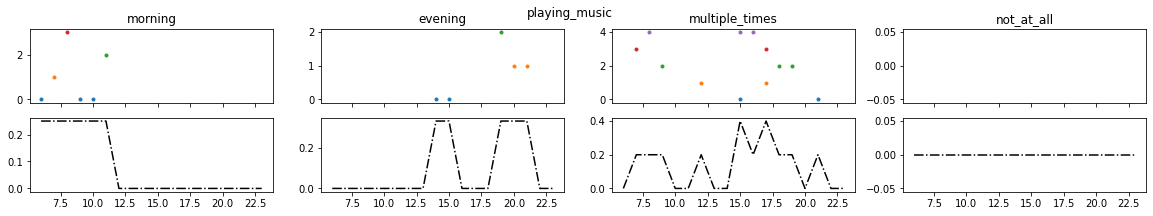

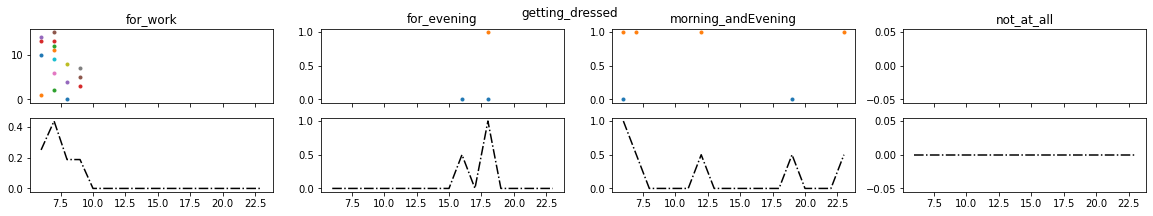

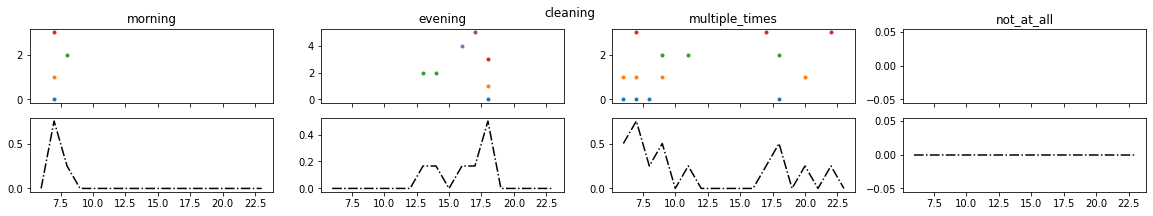

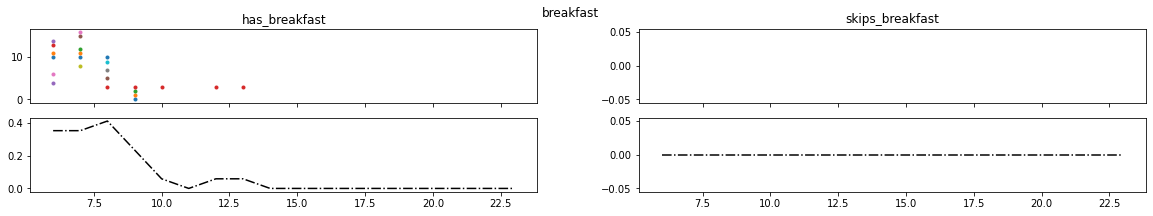

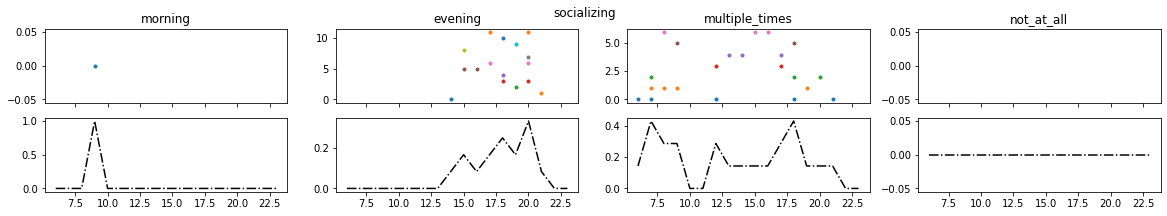

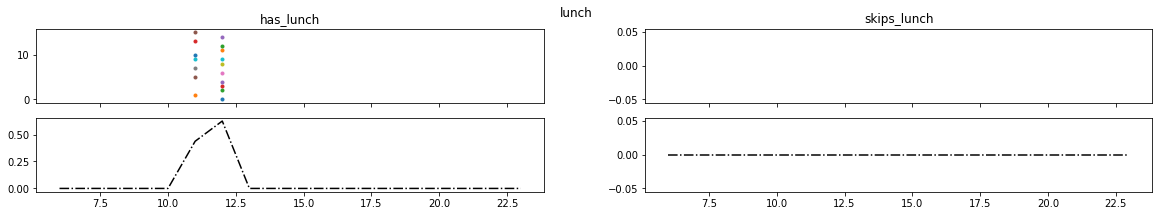

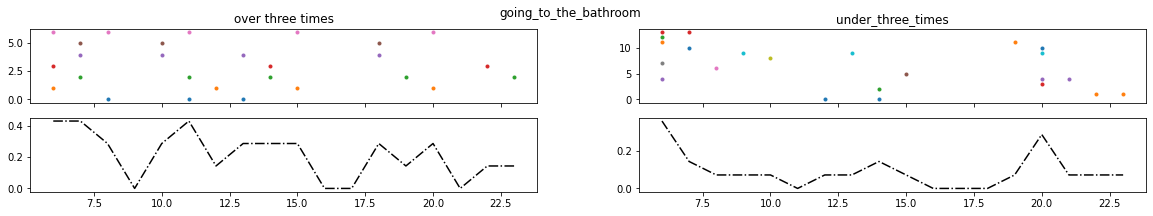

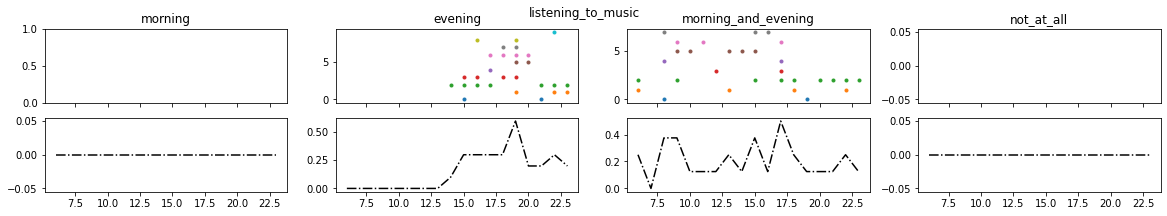

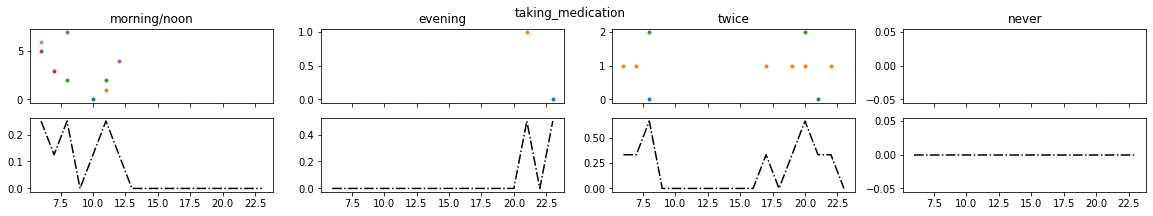

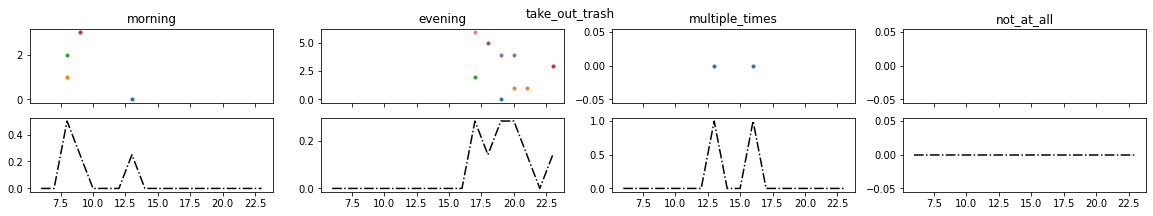

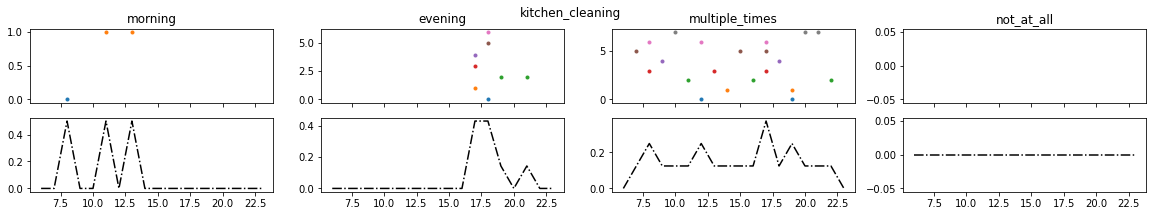

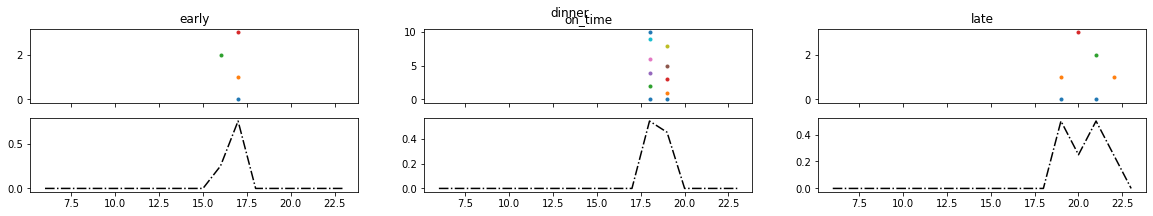

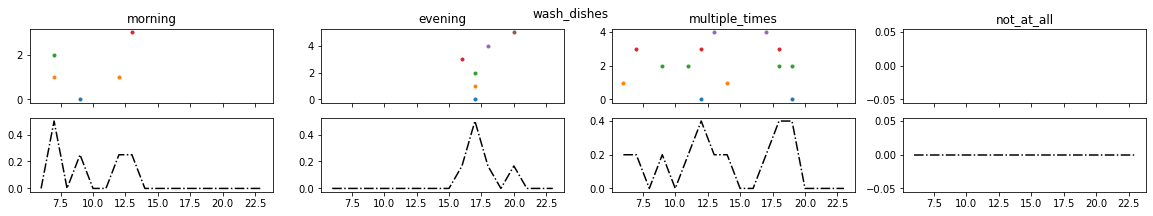

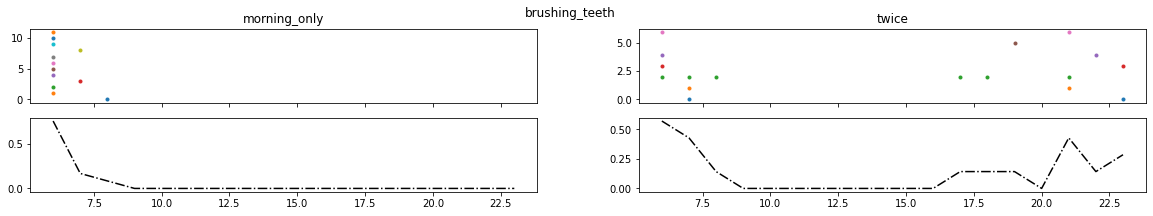

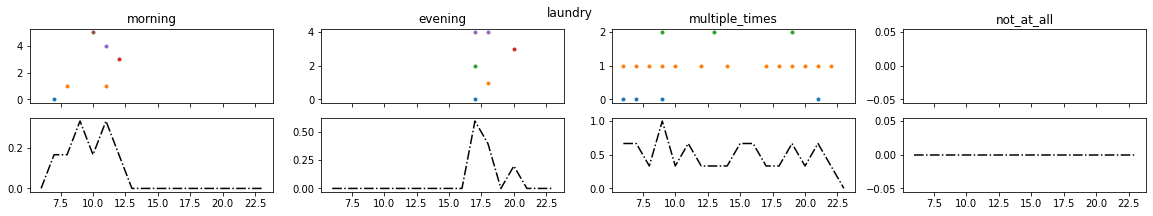

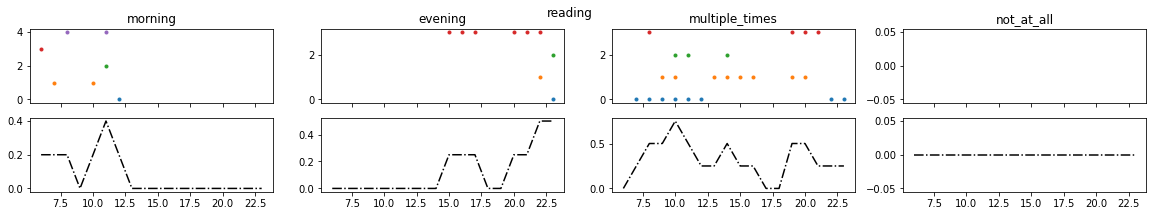

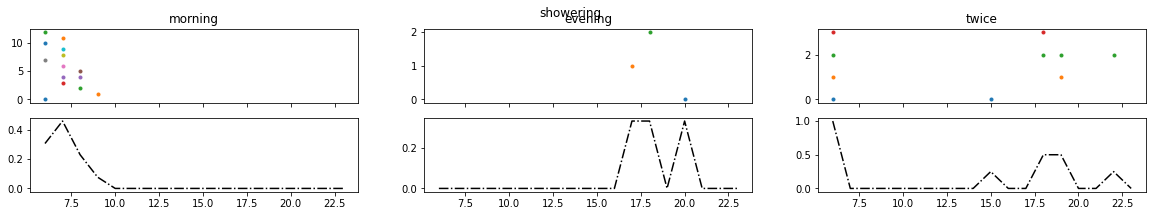

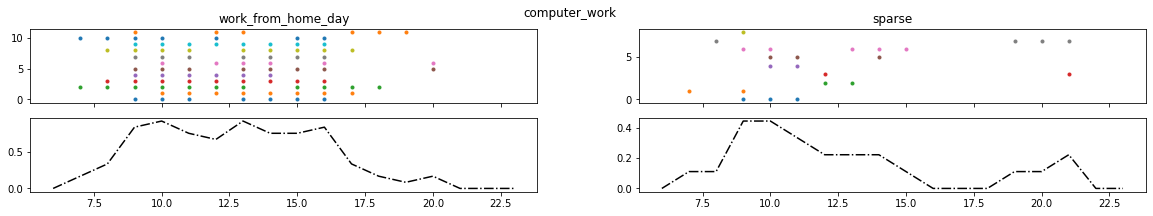

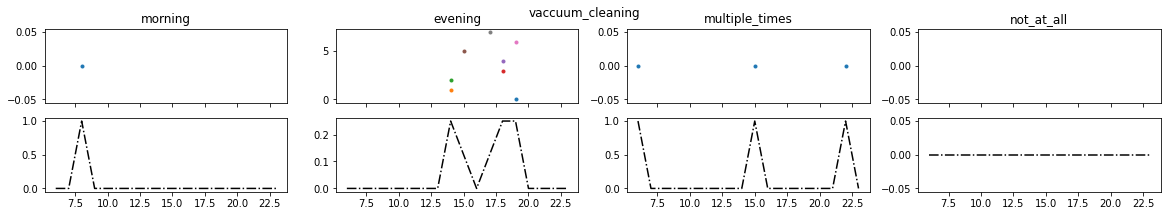

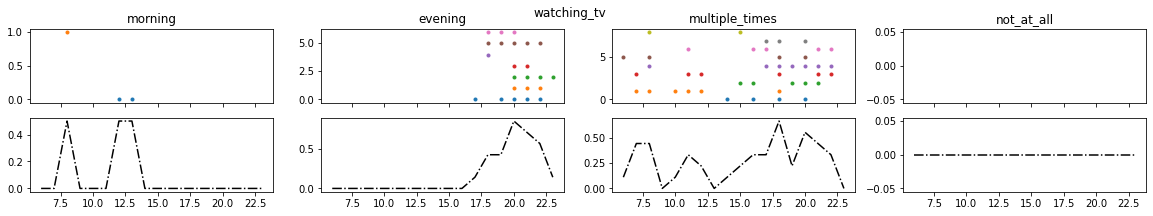

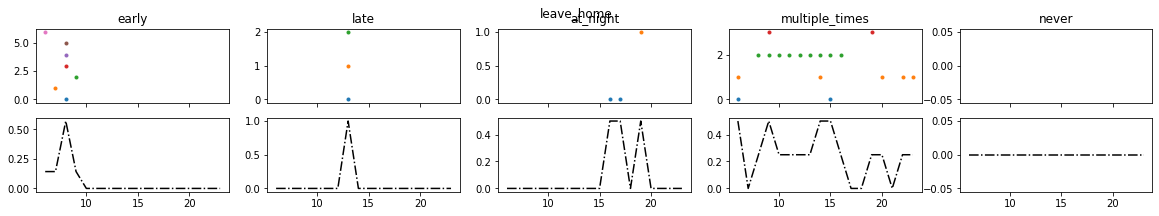

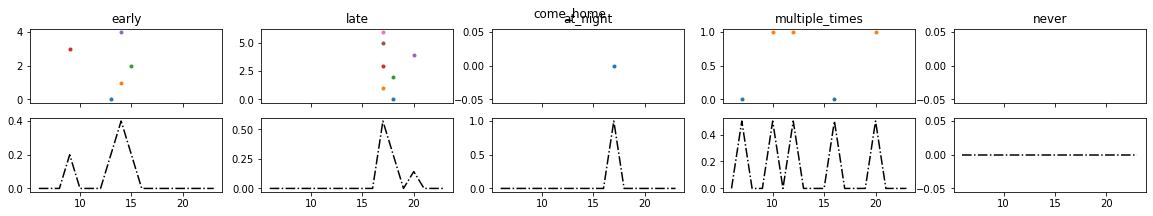

In [ ]:
with open('data/personaBasedSchedules/persona_traits.json') as f:
    persona_traits = json.load(f)

def plot_together(list_of_freqs, ax):
    for i,freqs in enumerate(list_of_freqs):
        freq_exist = np.array(start_times)[np.array(freqs) == 1]
        ax.plot(freq_exist,freq_exist*0 + i, '.')

trait_histograms = {}

for activity in persona_traits:
    if activity in ["leaving_home_and_coming_back"]:
        continue
    trait_histograms[activity] = {}
    fig, axs = plt.subplots(2, len(persona_traits[activity])-1, sharex=True)
    fig.set_size_inches(20, 3)
    fig.suptitle(activity)
    for i, (trait, files) in enumerate(persona_traits[activity].items()):
        if trait == 'None':
            continue
        trait_histograms[activity][trait] = [sum([scene_histogram[f][activity][st]/len(files) for f in files]) for st in start_times]
        axs[1][i].plot(start_times, trait_histograms[activity][trait], '-.k')
        plot_together([[scene_histogram[f][activity][st] for st in start_times]for f in files], axs[0][i])
        axs[0][i].set_title(trait)
    plt.savefig('data/personaBasedSchedules/histograms/'+activity+'.jpg')


with open('data/personaBasedSchedules/trait_histograms.json','w') as f:
    json.dump(trait_histograms, f)

In [ ]:
unreliable_participants_list = []

with open('data/personaBasedSchedules/persona_traits.json') as f:
    persona_traits = json.load(f)

for activity in persona_traits:
    unreliable_participants_list += (persona_traits[activity]['None'])

unreliable_participants = [p for p in set(unreliable_participants_list) if unreliable_participants_list.count(p) > 5]

personal_histograms = {}
for f in scene_histogram:
    if f in unreliable_participants:
        continue
    personal_histograms[f[:-5]] = {}
    for activity, hist in scene_histogram[f].items():
        if activity is None:
            continue
        personal_histograms[f[:-5]][activity] = list(hist.values())

with open('data/personaBasedSchedules/individual_histograms.json','w') as f:
    json.dump(personal_histograms, f)

KeyError: 'None'

In [ ]:
see_activities = list(activity_map.values())
see_activities.remove(None)
data_per_activity = {activity:{} for activity in see_activities}
ignore_datapoints = [2, 5, 12, 22]

for i, scene_hist in enumerate(sampler.scene_histogram):
    if i in ignore_datapoints:
        continue
    for activity in see_activities:
        data_list = list(scene_hist[activity].values())
        if max(data_list) > 0:
            data_per_activity[activity][i] = data_list

# num_clusters = {
#     "brushing_teeth":,
#     "showering":, 
#     "breakfast":,
#     "lunch":,
#     "dinner":,
#     "taking_medication":, 
#     "getting_dressed":, 
#     "computer_work":, 
#     "leaving_home_and_coming_back":, 
#     "laundry":, 
#     "socializing":
# }

clustering = {}
for activity in see_activities:
    clustering[activity] = {}

    cl = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=10).fit(np.array(list(data_per_activity[activity].values())))
    
    clustering[activity]['labels'] = cl.labels_
    clustering[activity]['centers'] = cl.cluster_centers_
   

In [ ]:

gap = 0.1

def plot_together(list_of_freqs, ax):
    width = (1 - gap)/len(list_of_freqs)
    for i,freqs in enumerate(list_of_freqs):
        # start_points = [s-0.5+i*width for s in start_times]
        # ax.bar(start_points, freqs, width=width)
        freq_exist = np.array(start_times)[np.array(freqs) == 1]
        ax.plot(freq_exist,freq_exist*0 + i, '.')

for activity in see_activities:
    cluster_labels = list(set(clustering[activity]['labels']))
    cluster_labels.sort()
    fig,axs = plt.subplots(1,len(cluster_labels)+1)
    fig.set_size_inches(20, 2)
    plot_together(np.array(list(data_per_activity[activity].values())), axs[-1])
    for i,label in enumerate(cluster_labels):
        axs[i].plot(start_times, clustering[activity]['centers'][i,:], '.-k')
        plot_together(np.array(list(data_per_activity[activity].values()))[clustering[activity]['labels'] == label], axs[i])
        axs[i].set_ylabel(label)
        axs[i].set_title(str(np.array(list(data_per_activity[activity].keys()))[clustering[activity]['labels'] == label]))
    fig.suptitle(activity)
    # fig.tight_layout()
    plt.show()

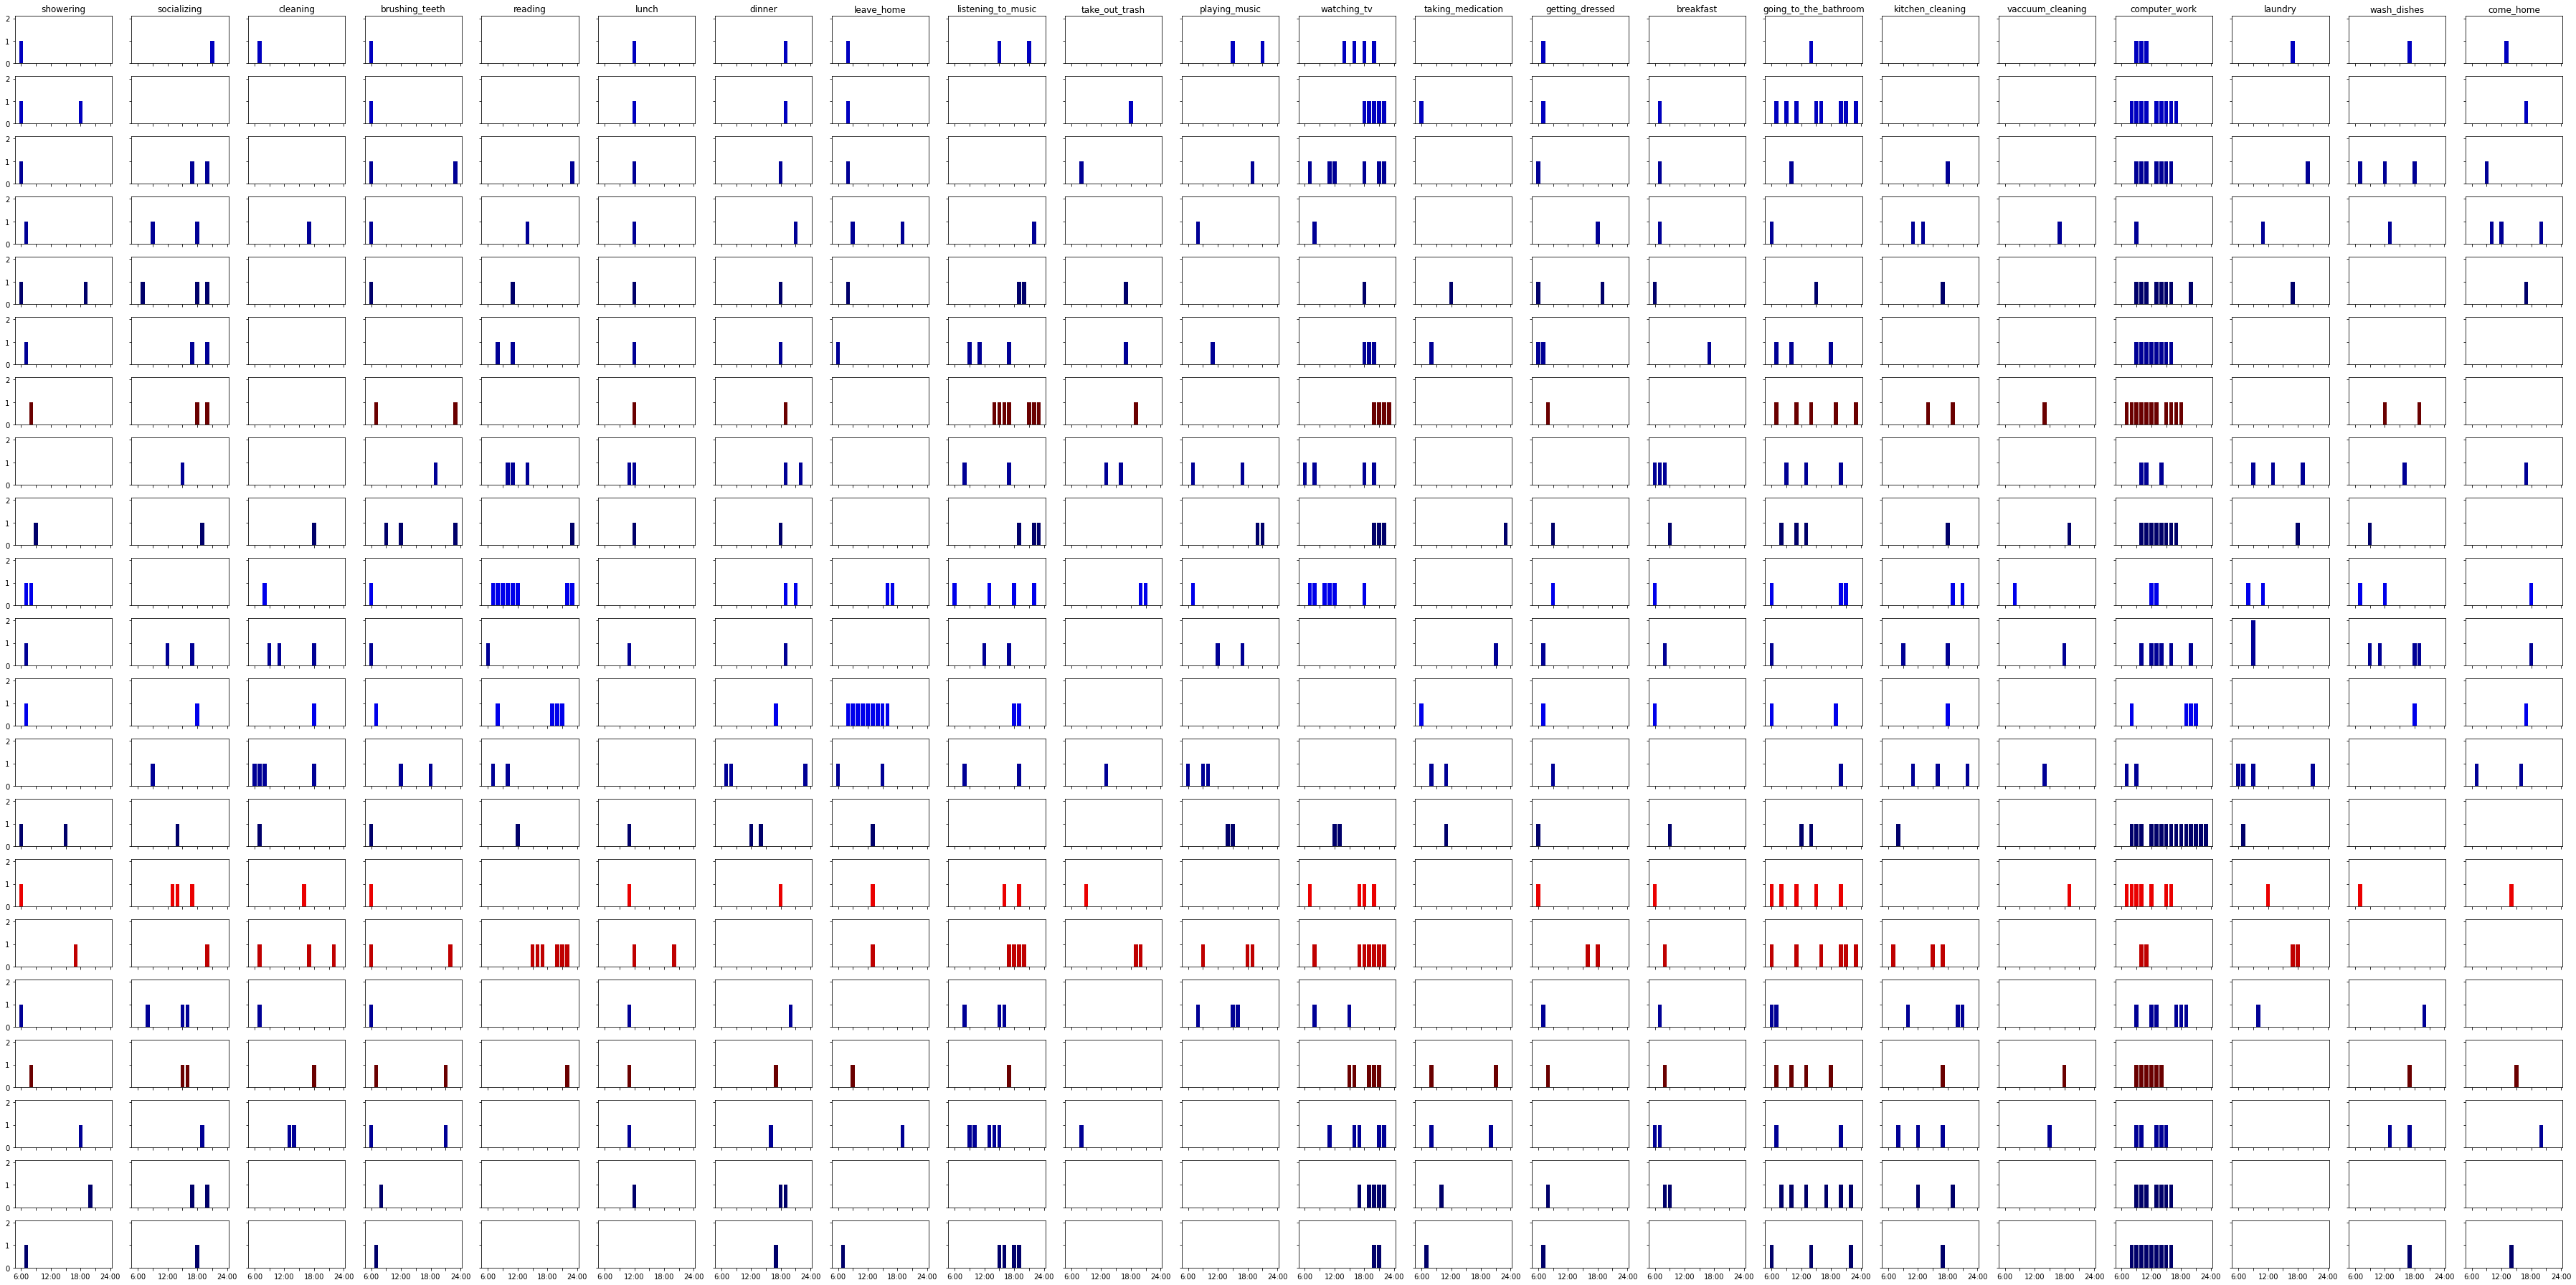

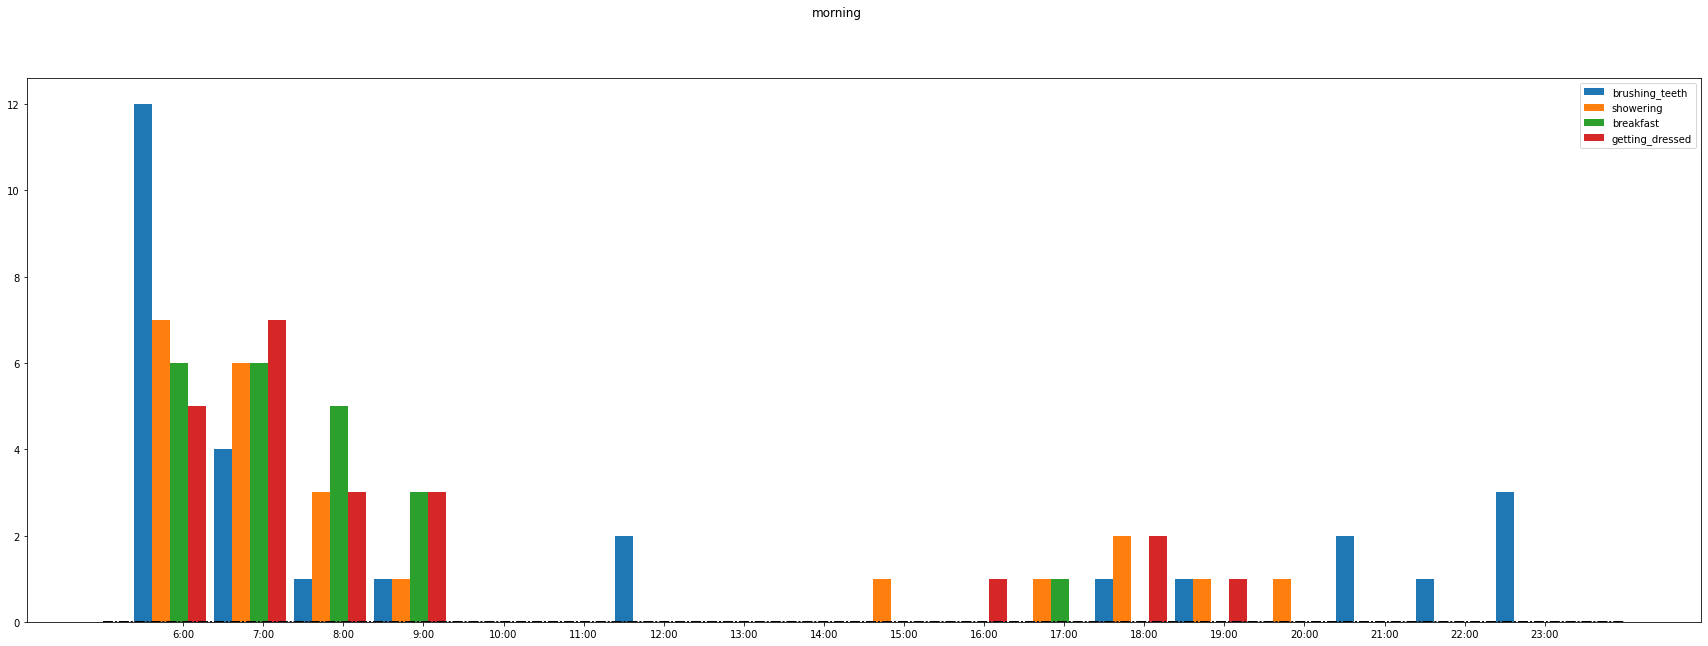

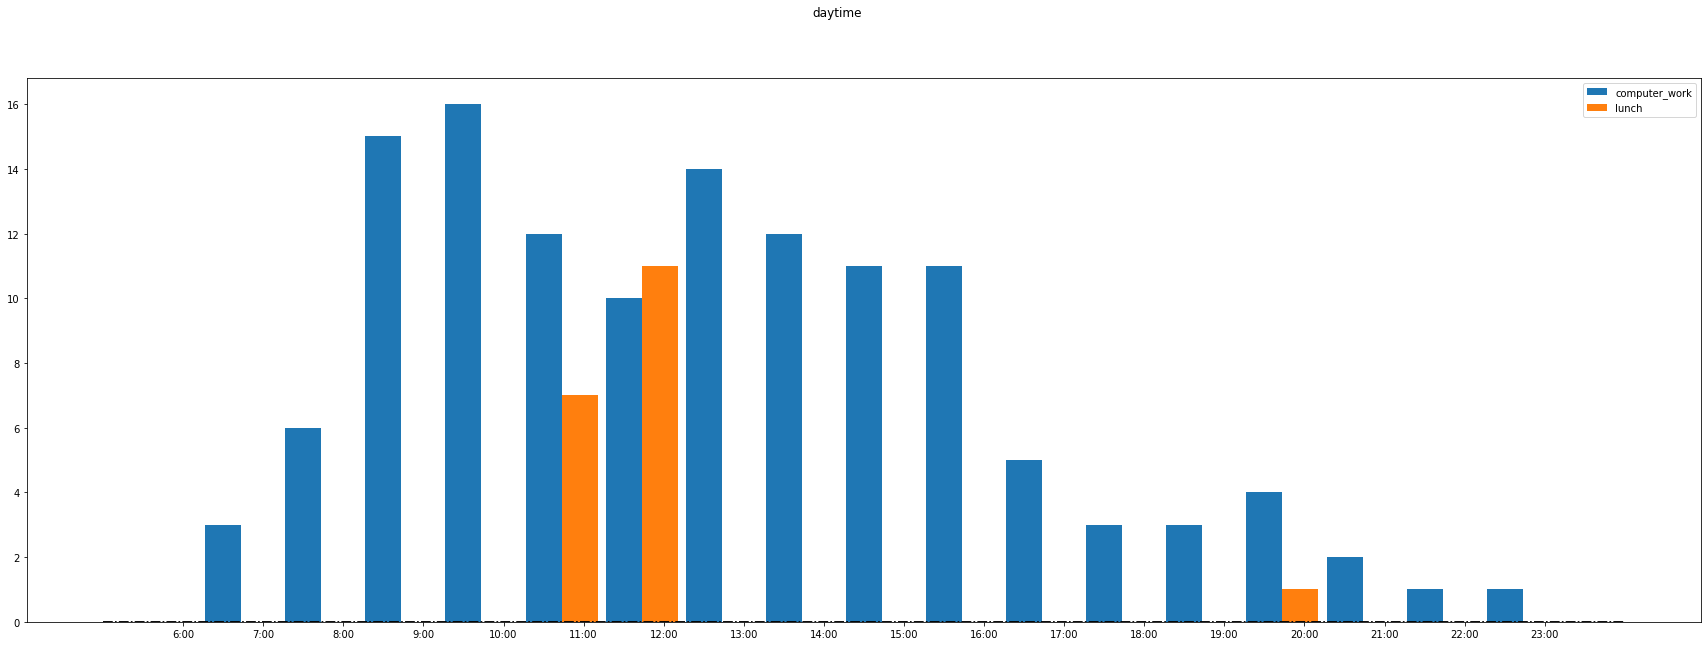

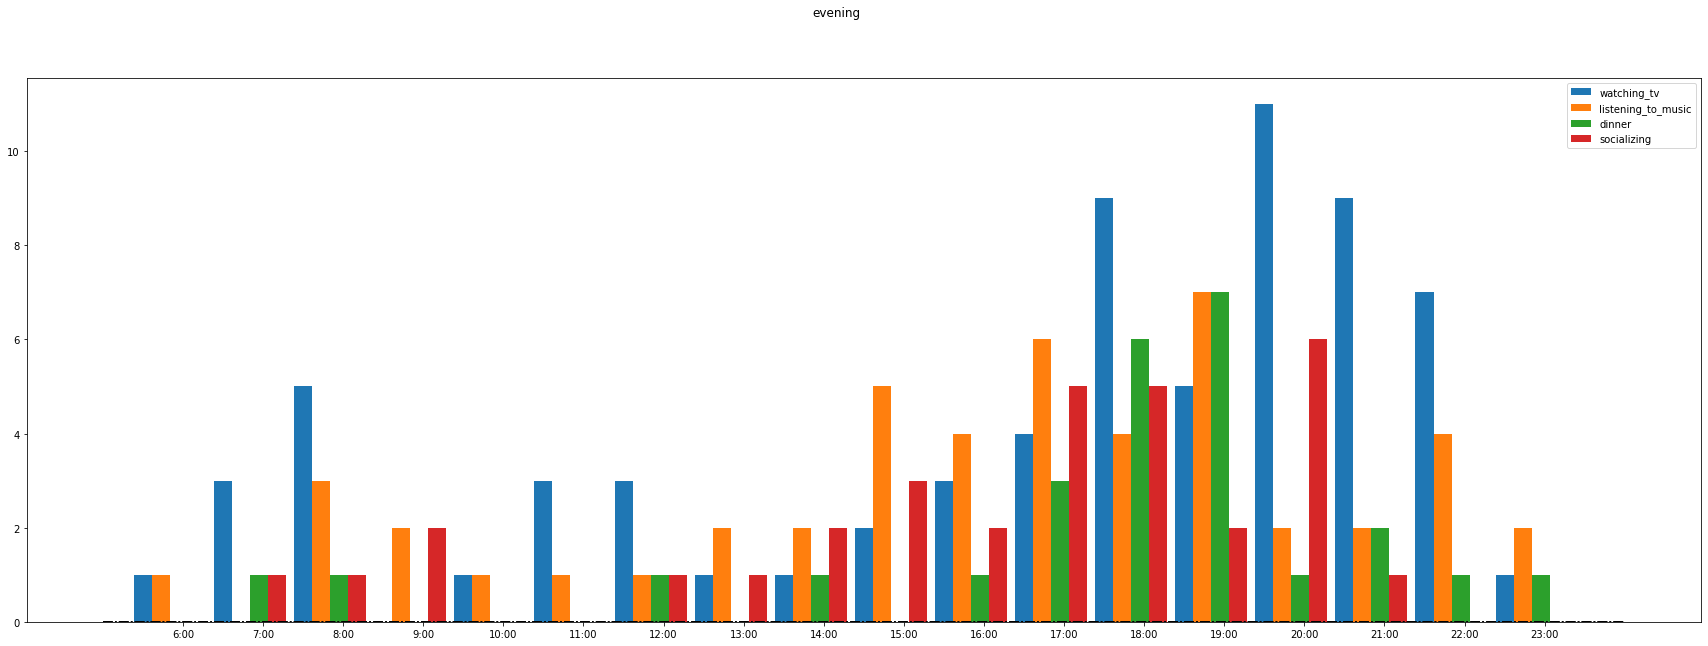

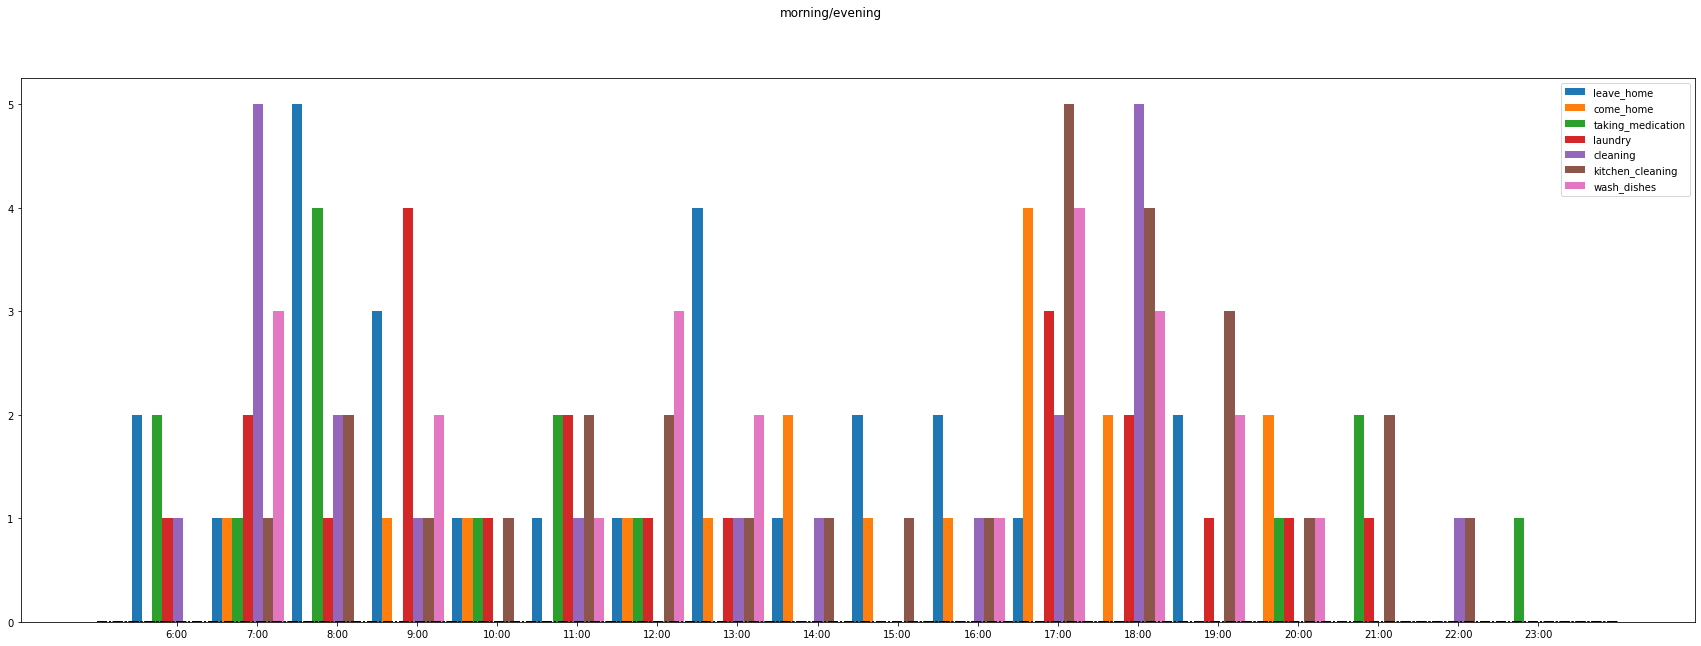

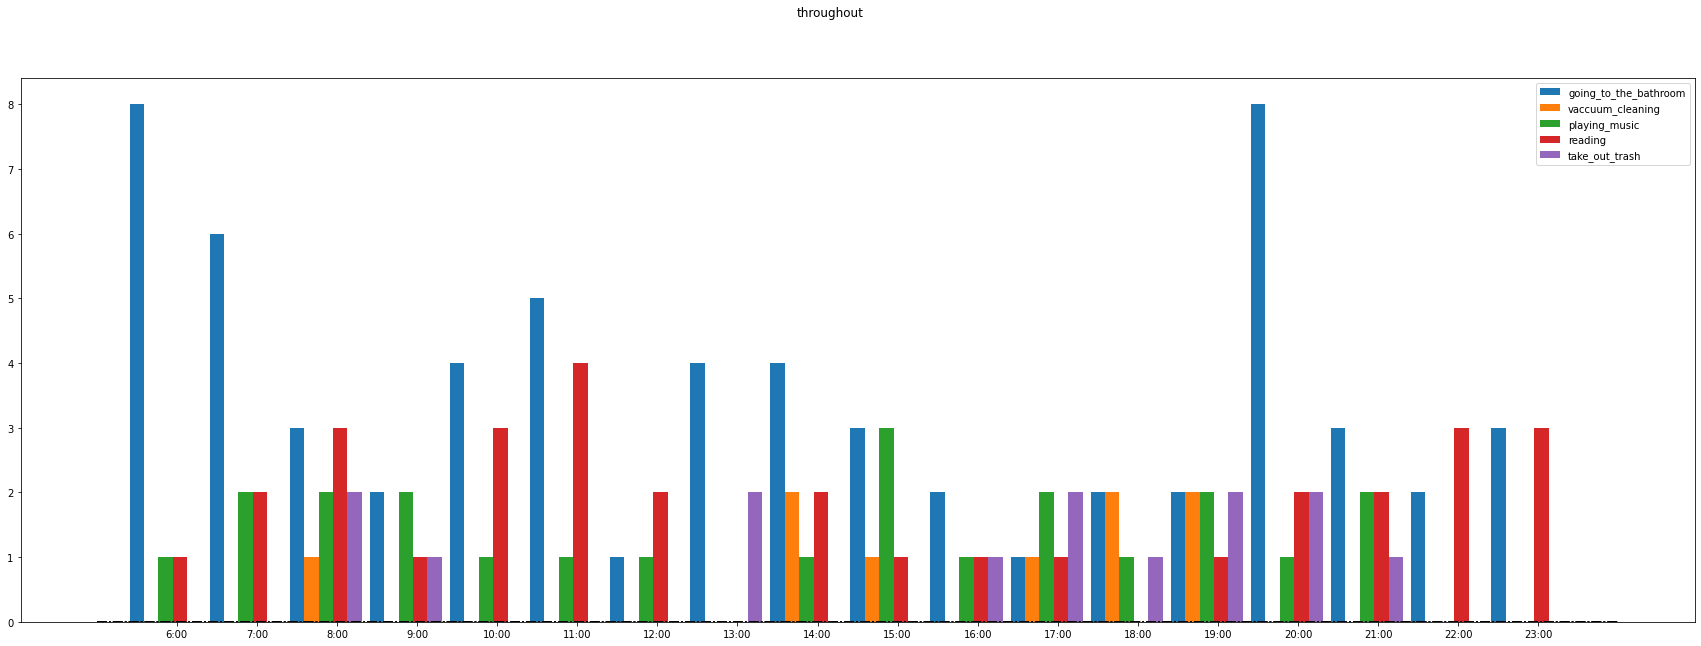

In [ ]:
sampler = ScheduleSampler(filter_num=0, idle_sampling_factor=idle_sampling_factor)

groups = {}
groups['morning'] = ['brushing_teeth', 'showering', 'breakfast', 'getting_dressed']
groups['daytime'] = ['computer_work', 'lunch']
groups['evening'] = ['watching_tv', 'listening_to_music', 'dinner', 'socializing']
groups['morning/evening'] = ['leave_home', 'come_home', 'taking_medication', 'laundry', 'cleaning', 'kitchen_cleaning', 'wash_dishes']
groups['throughout'] = ['going_to_the_bathroom', 'vaccuum_cleaning', 'playing_music', 'reading', 'take_out_trash']

clrs = sns.color_palette()

gap = 0.1
for name,group in groups.items():
    fig, ax = plt.subplots()
    fig.set_size_inches(30, 10)
    num_act = len(group)
    width = (1 - gap)/num_act
    for i, act in enumerate(group):
        freq = sampler.activity_histograms[act]
        start_points = [f-0.5+i*width for f in freq.keys()]
        ax.bar(start_points, [max(0, f-filter_num) for f in freq.values()], label=act, width=width, color=clrs[i])
        ax.plot([start_times[0]-1, start_times[-1]+1], [filter_num,filter_num], '-.k')
        # ax.plot(freq.keys(), [max(0, f-filter_num) for f in freq.values()], label=act, color=clrs[i])
    ax.set_xticks(start_times)
    ax.set_xticklabels([str(s)+':00' for s in start_times])
    fig.suptitle(name)
    plt.legend()
    plt.show()

In [17]:
sampler = ScheduleDistributionSampler('home_maker')

clrs = [sns.color_palette(), sns.color_palette()[-3:], sns.color_palette("dark"), sns.color_palette("muted"), sns.color_palette("pastel")]
fig, ax = plt.subplots()
fig.set_size_inches(27, 18.5)
for i,group in enumerate(groups.values()):
    for j, activity in enumerate(group):
        freq = sampler.activity_histograms[activity]
        d = [sampler.activity_threshold[st][activity][1] - sampler.activity_threshold[st][activity][0] for st in start_times]
        ax.bar(freq.keys(), d, label=activity, bottom=[sampler.activity_threshold[st][activity][0] for st in start_times], color=clrs[i][j])
ax.plot([start_times[0], start_times[-1]], [sampler.sampling_range,sampler.sampling_range])
ax.set_xticks(start_times)
ax.set_xticklabels([str(s)+':00' for s in start_times])
plt.legend()
plt.show()

TypeError: __init__() missing 1 required positional argument: 'message'

In [56]:
t = 7.5 * 60
print(sampler(t))


computer_work


In [57]:
print(sampler.sample_time_for('breakfast')/60)

6.483333333333333


In [59]:
print(sampler.sample_time_for('breakfast')/60)


7.7
